In [2]:
#Import the Libraries

import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



## Introduction

In [4]:
df_dig=pd.read_csv('data_dig.csv')                 # data_dig contains all the digits  images
y = df_dig['character'].values
df_dig.drop('character',axis=1,inplace=True)
df_dig = df_dig/255.0                              #Scaling the data

feat_cols=['pixel' + str(i) for i in range(df_dig.shape[1])]
df_dig.columns=feat_cols
df_dig['label']=y
df_dig['label']=df_dig['label'].apply(lambda i:str(i)) 
 

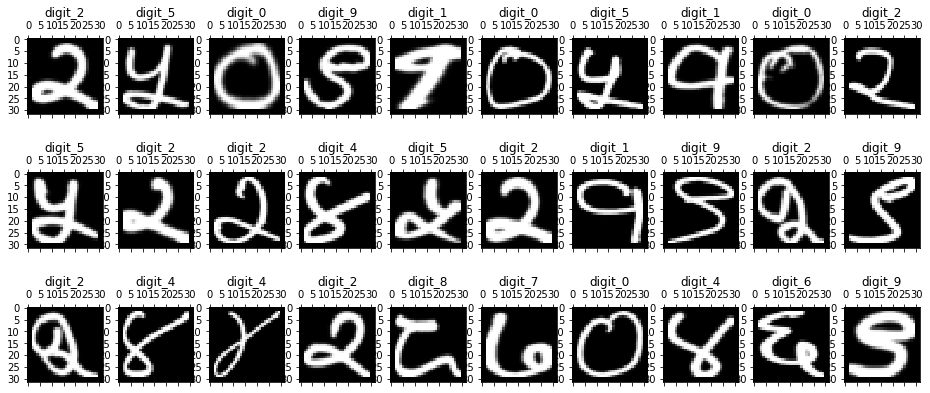

In [15]:
#Randomly selecting 30 images and presenting them together

rndperm=np.random.permutation(df_dig.shape[0])
plt.figure()
fig=plt.figure(figsize=(16,7))
for i in range(0,30):
    ax=fig.add_subplot(3,10,i+1)
    ax.matshow(df_dig.loc[rndperm[i],feat_cols].values.reshape(32,32).astype(float),cmap='gray')
    ax.set_title(y[rndperm[i]],y=1.2)
    
plt.show()

## Principal Component Analysis

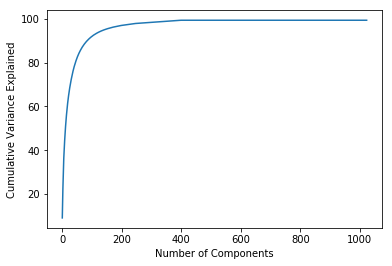

In [19]:
#Principal Component Analysis

from sklearn.decomposition import PCA
pca = PCA()
pca = pca.fit(df_dig[feat_cols].values)
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [20]:
#To find Variation explained by 200 components
pca_200 = PCA(n_components=200)
pca_result_200 = pca_200.fit_transform(df_dig[feat_cols].values)
np.sum(pca_200.explained_variance_ratio_)

0.97079399305369374

In [21]:
#To find Variation explained by 100 components
pca_100 = PCA(n_components=100)
pca_result_100 = pca_100.fit_transform(df_dig[feat_cols].values)
np.sum(pca_100.explained_variance_ratio_)

0.92027881166581005

In [22]:
#To find Variation explained by 50 components
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df_dig[feat_cols].values)
np.sum(pca_50.explained_variance_ratio_)

0.82043903953526731

In [23]:
#For inverse tranformation of images after applying PCA


df_pca_200=pca_200.fit_transform(df_dig[feat_cols].values)
df_pca_100=pca_100.fit_transform(df_dig[feat_cols].values)
df_pca_50=pca_50.fit_transform(df_dig[feat_cols].values)
pca_trans_200=pca_200.inverse_transform(df_pca_200)
pca_trans_100=pca_100.inverse_transform(df_pca_100)
pca_trans_50=pca_50.inverse_transform(df_pca_50)

df_pca_200=pd.DataFrame(pca_trans_200,columns=feat_cols)
df_pca_200['label']=y
df_pca_200['label']=df_pca_200['label'].apply(lambda i:str(i))

df_pca_100=pd.DataFrame(pca_trans_100,columns=feat_cols)
df_pca_100['label']=y
df_pca_100['label']=df_pca_100['label'].apply(lambda i:str(i))

df_pca_50=pd.DataFrame(pca_trans_50,columns=feat_cols)
df_pca_50['label']=y
df_pca_50['label']=df_pca_50['label'].apply(lambda i:str(i))




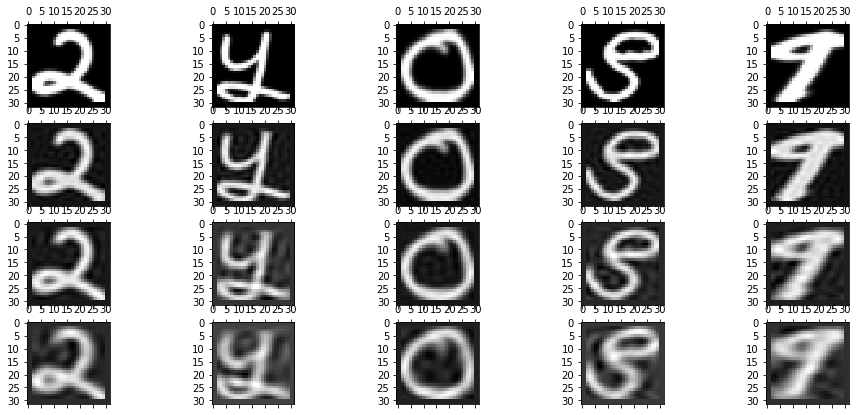

In [26]:
# To show variation in inverse transformation wtih different PCA components

plt.figure()
plt.gray()
fig=plt.figure(figsize=(16,7))
for i in range(0,5):
    ax=fig.add_subplot(4,5,i+1)
    ax.matshow(df_dig.loc[rndperm[i],feat_cols].values.reshape(32,32).astype(float))
    fx=fig.add_subplot(4,5,i+6)
    fx.matshow(df_pca_200.loc[rndperm[i],feat_cols].values.reshape(32,32).astype(float))
    gx=fig.add_subplot(4,5,i+11)
    gx.matshow(df_pca_100.loc[rndperm[i],feat_cols].values.reshape(32,32).astype(float))
    hx=fig.add_subplot(4,5,i+16)
    hx.matshow(df_pca_50.loc[rndperm[i],feat_cols].values.reshape(32,32).astype(float))
    

plt.show()

In [35]:
#Selection only 2 main principal components for visualisation 

df_dig_pca=pd.DataFrame(y)
df_dig_pca.columns=['label']
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_dig[feat_cols].values)

df_dig_pca['pca1'] = pca_result[:,0]
df_dig_pca['pca2'] = pca_result[:,1] 

pca.explained_variance_ratio_


array([ 0.0905304 ,  0.07451633])

In [36]:
pca_cols=['pca' + str(i+1) for i in range(200)]
df_pca_200=pd.DataFrame(pca_result_200,columns=pca_cols)
df_pca_200['label']=y
df_pca_200['label']=df_pca_200['label'].apply(lambda i:str(i))

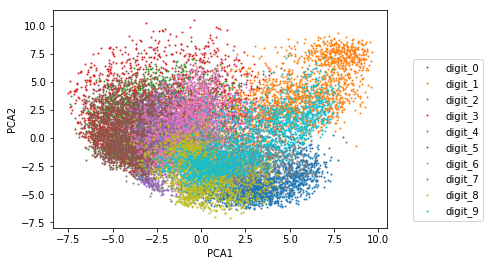

In [38]:
#Plotting points with 2 major principal compoenents and grouped by label

groups = df_dig_pca.groupby('label')

# Plot
plt.figure()
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=1, label=name)

ax.legend(loc=1,bbox_to_anchor=(1.3,0.8))
plt.xlabel('PCA1')
plt.ylabel('PCA2')


plt.show()
plt.savefig('fig4.jpeg')

## T-SNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.313s...
[t-SNE] Computed neighbors for 10000 samples in 194.540s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.695835
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.124832
[t-SNE] Error after 300 iterations: 2.568653


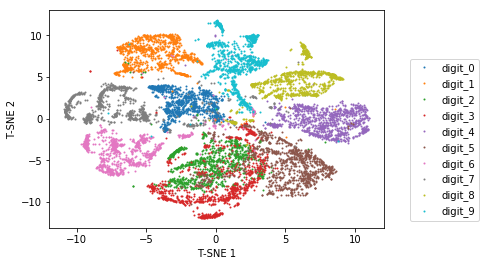

In [39]:
# Applying T-SNE and plotting points grouped by label

from sklearn.manifold import TSNE

n_sne = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_dig.loc[rndperm[:n_sne],feat_cols].values)
df_tsne = None
df_tsne = df_dig.loc[rndperm[:n_sne],:].copy()
df_tsne['xtsne'] = tsne_results[:,0]
df_tsne['ytsne'] = tsne_results[:,1]
groups = df_tsne.groupby('label')

# Plot
plt.figure()
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.xtsne, group.ytsne, marker='o', linestyle='', ms=1, label=name)

ax.legend(loc=1,bbox_to_anchor=(1.3,0.8))
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')


plt.show()

## LDA

/Users/vanshsachdeva/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


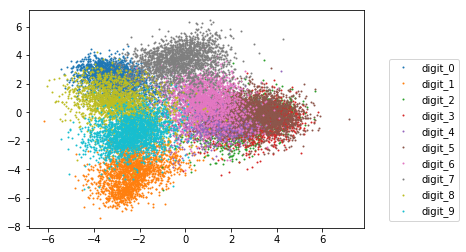

In [42]:
# Applying LDA and plotting points grouped by label

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_LDA_2D = lda.fit_transform(df_dig[feat_cols],y)
lda_cols=['lda' + str(i+1) for i in range(2)]
df_lda=pd.DataFrame(X_LDA_2D,columns=lda_cols)
df_lda['label']=df_dig['label']
groups = df_lda.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.lda1, group.lda2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.legend(loc=1,bbox_to_anchor=(1.3,0.8))

plt.show()




## Classification using ML

In [46]:
#Dividing the dataset into Training and Test dataset 
#ALso Label encoding Y

x_train, x_test, y_train, y_test = train_test_split(df_dig[feat_cols], y, test_size=0.33, random_state=422)
y_train=LabelEncoder().fit_transform(y_train)
y_test=LabelEncoder().fit_transform(y_test)

### Random Forest

In [47]:
# Doing Grid Search CV to find best value of hyperparameters 
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()

param_grid={
    
    'n_estimators':[500,700,900],
    'max_depth': [29,31,35]
}


grid_clf=GridSearchCV(clf_rf,param_grid,cv=3)
grid_clf.fit(x_train,y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500, 700, 900], 'max_depth': [29, 31, 35]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/vanshsachdeva/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


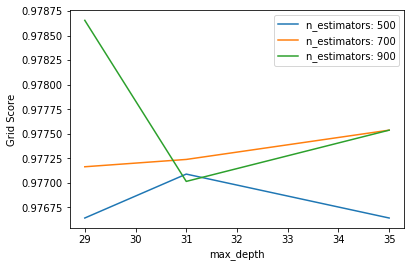

In [48]:
# Presenting the Grid Search CV results in the form of graph

n_estimators=[500,700,900]
max_depth=[29,31,35]
scores=[x[1] for x in grid_clf.grid_scores_]
scores=np.array(scores).reshape(len(max_depth),len(n_estimators))

plt.figure()
for ind,i in enumerate(n_estimators):
    plt.plot(max_depth,scores[:,ind],label='n_estimators: '+str(i))
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Grid Score')
plt.show()

### KNN

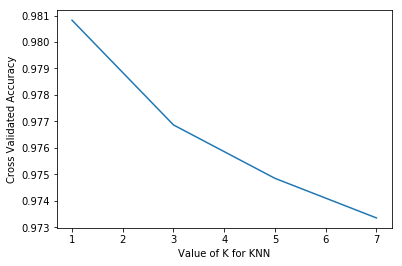

In [64]:
#Using 3 Cross Validation to find the best value of K 

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_range=[1,3,5,7]
k_scores=[]

for k in k_range:
    clf_knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(clf_knn,x_train,y_train,cv=3,scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure()
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')
plt.show()


### KNN After PCA

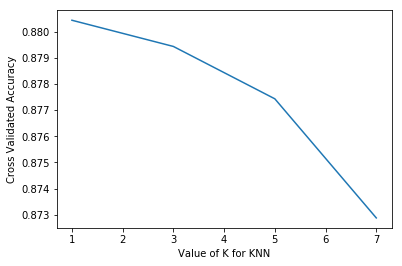

In [65]:
#Finding best value of K after applying PCA on the data

k_range=[1,3,5,7]
k_scores=[]

for k in k_range:
    clf_knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(clf_knn,df_pca_200[pca_cols],df_pca_200['label'],cv=3,scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure()
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')
plt.show()


### KNN after T-SNE

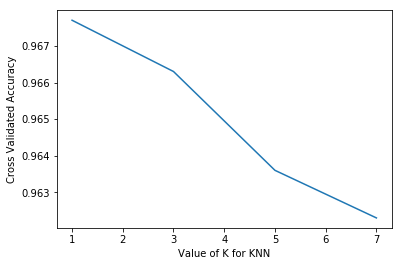

In [66]:
##Finding best value of K after applying TSNE on the data

k_range=[1,3,5,7]
k_scores=[]

for k in k_range:
    clf_knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(clf_knn,df_tsne[['xtsne','ytsne','ztsne']],df_tsne['label'],cv=3,scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure()
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')
plt.show()


## Neural Networks

In [67]:
# Using KERAS library for Neural Networks and CNN

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

y_train1=to_categorical(y_train) # Converting to categorical
y_test1=to_categorical(y_test)

from keras import backend as K
K.set_image_dim_ordering('th')
x_train,x_val,y_train1,y_val=train_test_split(x_train,y_train1,test_size=0.3,random_state=456) #Validation set by assigning 30% of training data images to the validation set


Using TensorFlow backend.


In [68]:
# Simple Model with 1 Hidden Layer

model=Sequential()
model.add(Dense(1024, input_dim=1024, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train1, epochs=30, batch_size=86,validation_data=(x_val,y_val))

Train on 9380 samples, validate on 4020 samples
Epoch 1/30
9380/9380 [==============================] - 3s 280us/step - loss: 0.3078 - acc: 0.9044 - val_loss: 0.1238 - val_acc: 0.9654
Epoch 2/30
9380/9380 [==============================] - 2s 248us/step - loss: 0.0880 - acc: 0.9761 - val_loss: 0.0956 - val_acc: 0.9741
Epoch 3/30
9380/9380 [==============================] - 3s 302us/step - loss: 0.0452 - acc: 0.9891 - val_loss: 0.0917 - val_acc: 0.9736
Epoch 4/30
9380/9380 [==============================] - 2s 226us/step - loss: 0.0236 - acc: 0.9958 - val_loss: 0.0733 - val_acc: 0.9764
Epoch 5/30
9380/9380 [==============================] - 2s 223us/step - loss: 0.0149 - acc: 0.9974 - val_loss: 0.0622 - val_acc: 0.9821
Epoch 6/30
9380/9380 [==============================] - 2s 227us/step - loss: 0.0061 - acc: 0.9996 - val_loss: 0.0607 - val_acc: 0.9833
Epoch 7/30
9380/9380 [==============================] - 2s 222us/step - loss: 0.0032 - acc: 0.9999 - val_loss: 0.0596 - val_acc: 0.9841


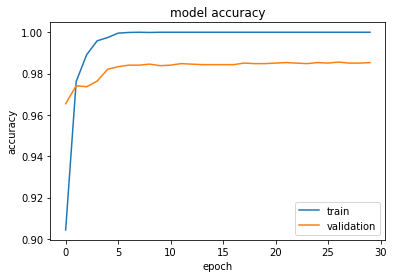

In [69]:
# plotting the results of previous model

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [72]:
# 2nd Neural Network model with more hidden layers

from keras.layers.normalization import BatchNormalization
model=Sequential()
model.add(Dense(1024, input_dim=1024, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(50,kernel_initializer='normal',activation='relu'))
model.add(BatchNormalization())
model.add(Dense(50,kernel_initializer='normal',activation='relu'))
model.add(BatchNormalization())
model.add(Dense(70,kernel_initializer='normal',activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(x_train, y_train1, epochs=30, batch_size=86,validation_data=(x_val,y_val))

Train on 9380 samples, validate on 4020 samples
Epoch 1/30
9380/9380 [==============================] - 4s 430us/step - loss: 0.5372 - acc: 0.8855 - val_loss: 0.1397 - val_acc: 0.9634
Epoch 2/30
9380/9380 [==============================] - 4s 388us/step - loss: 0.0914 - acc: 0.9803 - val_loss: 0.0870 - val_acc: 0.9766
Epoch 3/30
9380/9380 [==============================] - 3s 303us/step - loss: 0.0475 - acc: 0.9881 - val_loss: 0.1035 - val_acc: 0.9657
Epoch 4/30
9380/9380 [==============================] - 3s 340us/step - loss: 0.0432 - acc: 0.9894 - val_loss: 0.1219 - val_acc: 0.9629
Epoch 5/30
9380/9380 [==============================] - 3s 297us/step - loss: 0.0552 - acc: 0.9856 - val_loss: 0.0782 - val_acc: 0.9766
Epoch 6/30
9380/9380 [==============================] - 3s 290us/step - loss: 0.0248 - acc: 0.9932 - val_loss: 0.0686 - val_acc: 0.9789
Epoch 7/30
9380/9380 [==============================] - 3s 292us/step - loss: 0.0266 - acc: 0.9931 - val_loss: 0.0713 - val_acc: 0.9776


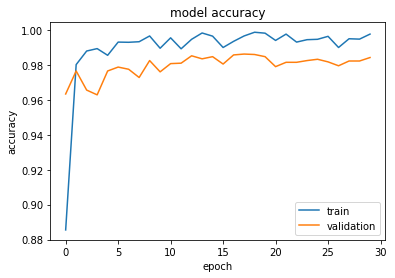

In [73]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

## CNN

In [75]:
## Setting up the dataset for CNN

x=df_dig[feat_cols].values
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=422) #Splitting the dataset into test and training
y_train=LabelEncoder().fit_transform(y_train)
y_test=LabelEncoder().fit_transform(y_test)
y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)
x_train,x_val,y_train1,y_val=train_test_split(x_train,y_train1,test_size=0.3,random_state=456) # Splitting the training dataset into validation and training
x_train = x_train.reshape(x_train.shape[0], 1, 32, 32).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 32, 32).astype('float32')
x_val=x_val.reshape(x_val.shape[0],1,32,32).astype('float32')


In [79]:
## CNN-MODEL

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (1,32,32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))



In [80]:
# Augmentation of the images

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [81]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit_generator(datagen.flow(x_train, y_train1, batch_size=32),steps_per_epoch=len(x_train) / 32, epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
294/293 [==============================] - 179s 610ms/step - loss: 0.6481 - acc: 0.7825 - val_loss: 0.0816 - val_acc: 0.9766
Epoch 2/20
294/293 [==============================] - 177s 603ms/step - loss: 0.2140 - acc: 0.9335 - val_loss: 0.0363 - val_acc: 0.9918
Epoch 3/20
294/293 [==============================] - 178s 605ms/step - loss: 0.1429 - acc: 0.9544 - val_loss: 0.0401 - val_acc: 0.9871
Epoch 4/20
294/293 [==============================] - 177s 602ms/step - loss: 0.0982 - acc: 0.9718 - val_loss: 0.0284 - val_acc: 0.9930
Epoch 5/20
294/293 [==============================] - 189s 644ms/step - loss: 0.0930 - acc: 0.9719 - val_loss: 0.0221 - val_acc: 0.9950
Epoch 6/20
294/293 [==============================] - 184s 626ms/step - loss: 0.0673 - acc: 0.9792 - val_loss: 0.0190 - val_acc: 0.9955
Epoch 7/20
294/293 [==============================] - 179s 607ms/step - loss: 0.0518 - acc: 0.9843 - val_loss: 0.0271 - val_acc: 0.9948
Epoch 8/20
294/293 [============================

In [83]:
# Model test on test datset 
    
scores = model.evaluate(x_test, y_test1, verbose=0)
print("Model Accuracy on Test data is :{}%".format(scores[1]))

Model Accuracy on Test data is :0.998030303030303%


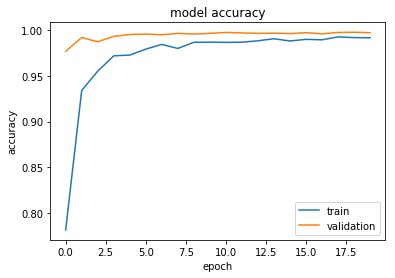

In [86]:
# plotting results of the CNN model

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

#### Confusion Matrix on Test Dataset

In [84]:


from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test1,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

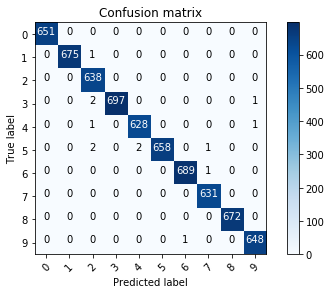

In [85]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 



#### Top 9 Errors

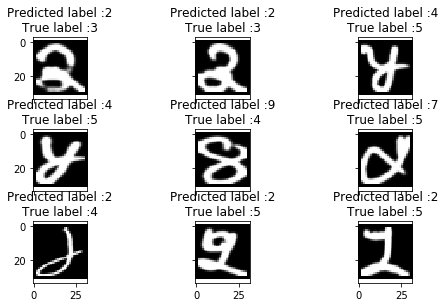

In [87]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
x_test_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    fig.tight_layout()
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    fig.subplots_adjust(hspace=.5,wspace=2)
    plt.show()

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-9:]

# Show the top 6 errors
display_errors(most_important_errors, x_test_errors, Y_pred_classes_errors, Y_true_errors)

# Whole Dataset

Earlier we were only using digits but now we will test for whole dataset

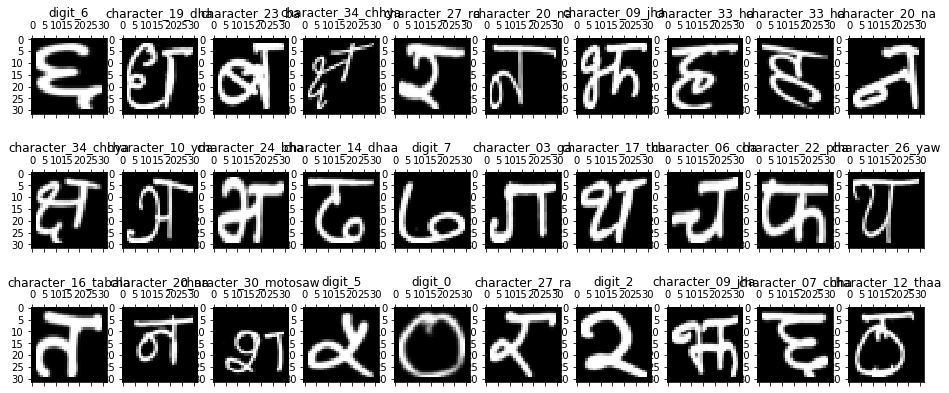

In [3]:
df_dig=pd.read_csv('data.csv') # Full dataset
y = df_dig['character'].values
df_dig.drop('character',axis=1,inplace=True)
df_dig = df_dig/255.0 #Scaling the image

feat_cols=['pixel' + str(i) for i in range(df_dig.shape[1])]
df_dig.columns=feat_cols
df_dig['label']=y
df_dig['label']=df_dig['label'].apply(lambda i:str(i))

#Plotting some of the images 

rndperm=np.random.permutation(df_dig.shape[0])
plt.figure()
plt.gray()
fig=plt.figure(figsize=(16,7))
for i in range(0,30):
    ax=fig.add_subplot(3,10,i+1)
    ax.matshow(df_dig.loc[rndperm[i],feat_cols].values.reshape(32,32).astype(float))
    ax.set_title(y[rndperm[i]],y=1.2)
    
plt.show()

#### CNN Model

Same model of CNN is used here but was trained in different notebook, hence output is not shown here. But after training we will get cross validation accuracy of 98.7% and test accuracy of 98.8%. Results and graph are provided in the Report.

In [ ]:
x=df_dig[feat_cols].values
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=422)
y_train=LabelEncoder().fit_transform(y_train)
y_test=LabelEncoder().fit_transform(y_test)

y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

x_train,x_val,y_train1,y_val=train_test_split(x_train,y_train1,test_size=0.3,random_state=456)
x_train = x_train.reshape(x_train.shape[0], 1, 32, 32).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 32, 32).astype('float32')
x_val=x_val.reshape(x_val.shape[0],1,32,32).astype('float32')

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (1,32,32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(46, activation = "softmax"))


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit_generator(datagen.flow(x_train, y_train1, batch_size=32),steps_per_epoch=len(x_train) / 32, epochs=15,validation_data=(x_val,y_val))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

scores = model.evaluate(x_test, y_test1, verbose=0)
print(scores)

